# Objective:

Would like to predict median house price in califorina region

We are going to perform below steps:

1. Data collection and curating
2. Data processing
3. Train and test datasets
4. variable reduction techniques
5. Modle Building 
6. model validation
7. Deploy the model


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sms

In [2]:
house=pd.read_csv(r"C:\ksr\data science\DS_batch1\Practical_dataset\houseing_price_prediction\housing.csv")

In [3]:
house.shape # dimensions of a data

(20640, 10)

In [4]:
house.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [5]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [6]:
house.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400


In [7]:
house["population"].min()

3

In [8]:
house["population"].max()

35682

In [9]:
house1=house[house["population"]<600]

In [10]:
house1.shape

(2853, 10)

In [11]:
house1["population"].max()

599

In [12]:
house1["population"].min()

3

In [13]:
import researchpy as rp

In [14]:
rp.summary_cat(house1["ocean_proximity"])

,Variable,Outcome,Count,Percent
0,ocean_proximity,INLAND,1174,41.15
1,,<1H OCEAN,901,31.58
2,,NEAR BAY,397,13.92
3,,NEAR OCEAN,379,13.28
4,,ISLAND,2,0.07


In [15]:
rp.summary_cat(house["ocean_proximity"])

,Variable,Outcome,Count,Percent
0,ocean_proximity,<1H OCEAN,9136,44.26
1,,INLAND,6551,31.74
2,,NEAR OCEAN,2658,12.88
3,,NEAR BAY,2290,11.09
4,,ISLAND,5,0.02


In [16]:
house2=house[house["population"]>3000]

In [17]:
house2.shape

(1357, 10)

In [18]:
import os

In [19]:
os.getcwd()

'C:\\Users\\Koti\\Documents\\Data_Science\\DS_FEB_2020\\codes'

In [20]:
path=r"C:\Users\Koti\Documents\Data_Science\DS_FEB_2020\codes\standard_code\userdefined_functions"

In [21]:
os.chdir(path)

In [22]:
from summary_stats import summary_stat
from categorical_summary import char_summary
from missing_value import miss_identify

In [23]:
summary_stat(data=house)

,count,min,5%,25%,50%,mean,75%,90%,95%,99.7%,max,std
longitude,20640.0,-124.3500,-122.47000,-121.8000,-118.4900,-119.569704,-118.01000,-117.25000,-117.080000,-115.520000,-114.3100,2.003532
latitude,20640.0,32.5400,32.82000,33.9300,34.2600,35.631861,37.71000,38.48000,38.960000,41.211660,41.9500,2.135952
housing_median_age,20640.0,1.0000,8.00000,18.0000,29.0000,28.639486,37.00000,46.00000,52.000000,52.000000,52.0000,12.585558
total_rooms,20640.0,2.0000,620.95000,1447.7500,2127.0000,2635.763081,3148.00000,4651.50000,6213.200000,16887.071000,39320.0000,2181.615252
total_bedrooms,20433.0,1.0000,137.00000,296.0000,435.0000,537.870553,647.00000,965.00000,1275.400000,3078.704000,6445.0000,421.385070
population,20640.0,3.0000,348.00000,787.0000,1166.0000,1425.476744,1725.00000,2566.00000,3288.000000,7924.395000,35682.0000,1132.462122
households,20640.0,1.0000,125.00000,280.0000,409.0000,499.539680,605.00000,890.00000,1162.000000,2826.249000,6082.0000,382.329753
median_income,20640.0,0.4999,1.60057,2.5634,3.5348,3.870671,4.74325,6.15921,7.300305,13.580228,15.0001,1.899822
median_house_value,20640.0,14999.0000,66200.00000,119600.0000,179700.0000,206855.816909,264725.00000,376600.00000,489810.000000,500001.000000,500001.0000,115395.615874


# Summary stas insights:

1. average median age of houses are 29, it seems data looks correct and no extreme values

2. it seems there are extreme values are presented in total rooms variable

3. it seems there are some extreme values in total bed rooms



In [24]:

char_summary(house)

,Variable,Outcome,Count,Percent
0,ocean_proximity,<1H OCEAN,9136,44.26
1,,INLAND,6551,31.74
2,,NEAR OCEAN,2658,12.88
3,,NEAR BAY,2290,11.09
4,,ISLAND,5,0.02


In [25]:
miss_identify(house)

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64

In [70]:
from sklearn.impute import SimpleImputer
sm=SimpleImputer(strategy="most_frequent")
house4=pd.DataFrame(sm.fit_transform(house),columns=house.columns)
house4.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,NEAR BAY,342200


In [71]:
from Missing_impute import missing_impute


In [72]:
house4=missing_impute(house)

In [73]:
house4.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [97]:
house5=house4.select_dtypes(exclude="object")

In [91]:
house5.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


# outlier identification

In [148]:
from outlier_identification import out_identy


ImportError: cannot import name 'out_identy' from 'outlier_identification' (C:\Users\Koti\Documents\Data_Science\DS_FEB_2020\codes\standard_code\userdefined_functions\outlier_identification.py)

In [137]:
house4.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Outlier treatment

In [155]:
from outlier_treatment import outlier_treatment

In [156]:
import numpy as np
house5=outlier_treatment(house4)

NameError: name 'np' is not defined

In [157]:
house5.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.000,129.0,322.0,126.0,8.013025,452600.0,NEAR BAY
1,-122.22,37.86,21.0,5698.375,1106.0,2401.0,1092.5,8.013025,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.000,190.0,496.0,177.0,7.257400,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.000,235.0,558.0,219.0,5.643100,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.000,280.0,565.0,259.0,3.846200,342200.0,NEAR BAY


In [163]:
house5.groupby("ocean_proximity")["housing_median_age"].count()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
Name: housing_median_age, dtype: int64

In [164]:
house5.groupby("ocean_proximity").mean()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,-118.847766,34.560577,29.279225,2447.172039,508.401215,1425.964426,484.414350,4.136089,239004.443958
INLAND,-119.732990,36.731829,24.271867,2461.220062,490.840978,1287.392764,445.257365,3.195006,124728.605709
ISLAND,-118.354000,33.358000,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,-122.260694,37.801057,37.730131,2368.122380,488.755076,1182.115284,464.035153,4.078872,257614.541485
NEAR OCEAN,-119.332555,34.738439,29.347254,2439.745297,512.714212,1287.858916,479.330700,3.905461,247919.972724


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

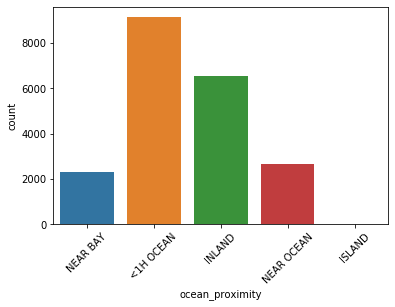

In [166]:
sns.countplot(house5["ocean_proximity"])
plt.xticks(rotation=45)

In [167]:
house5.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.000,129.0,322.0,126.0,8.013025,452600.0,NEAR BAY
1,-122.22,37.86,21.0,5698.375,1106.0,2401.0,1092.5,8.013025,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.000,190.0,496.0,177.0,7.257400,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.000,235.0,558.0,219.0,5.643100,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.000,280.0,565.0,259.0,3.846200,342200.0,NEAR BAY


In [168]:
house5["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [169]:
group1=house5[house5["ocean_proximity"]=="<1H OCEAN"]
group2=house5[house5["ocean_proximity"]=="INLAND"]
group3=house5[house5["ocean_proximity"]=="NEAR OCEAN"]
group4=house5[house5["ocean_proximity"]=="ISLAND"]
group5=house5[house5["ocean_proximity"]=="NEAR BAY"]
print(group1.shape,group2.shape,group3.shape,group4.shape,group5.shape)

(9136, 10) (6551, 10) (2658, 10) (5, 10) (2290, 10)


In [170]:
from scipy.stats import f_oneway

# hypothesis testing : 

Ho: No difference between average median house value in each group

Ha: There is some difference between average median house value in groups

In [171]:
f_oneway(group1["median_house_value"],group2["median_house_value"],group3["median_house_value"],group4["median_house_value"],group5["median_house_value"])

F_onewayResult(statistic=1651.1653235279769, pvalue=0.0)

In [174]:
rp.summary_cont(house5["median_house_value"].groupby(house5["ocean_proximity"]))

,N,Mean,SD,SE,95% Conf.,Interval
ocean_proximity,,,,,,
<1H OCEAN,9136,239004.443958,103532.686509,1083.177021,236881.300798,241127.587118
INLAND,6551,124728.605709,69604.932814,859.975778,123042.924522,126414.286896
ISLAND,5,380440.000000,80559.561816,36027.331292,301491.629420,459388.370580
NEAR BAY,2290,257614.541485,119751.872437,2502.445176,252708.677674,262520.405295
NEAR OCEAN,2658,247919.972724,119441.875614,2316.749758,243378.288776,252461.656672


In [175]:
from statsmodels.formula.api import ols

In [176]:
results=ols("median_house_value~C(ocean_proximity)",data=house5).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     1651.
Date:                Wed, 20 May 2020   Prob (F-statistic):               0.00
Time:                        07:02:11   Log-Likelihood:            -2.6661e+05
No. Observations:               20640   AIC:                         5.332e+05
Df Residuals:                   20635   BIC:                         5.333e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          2.39e+05   1031.047    231.808      0.000    2.37e+05    2.41e+05
C(ocean_proximity)[T.INLAND]     -1.143e+05   1595.492    -71.624      0.000   -1.17e+05   -1.11e+05
C(ocean_proximity)[T.ISLAND]      1.414e+05   4.41e+04      3.208      0.001     5.5e+04    2.28e+05
C(ocean_proximity)[T.NEAR BAY]    1.861e+04   2303.073      8.081      0.000    1.41e+04    2.31e+04
C(ocean_proximity)[T.NEAR OCEAN]  8915.5288   2171.858      4.105      0.000    4658.515    1.32e+04
==============================================================================
Omnibus:                     2310.125   Durbin-Watson:                   0.413
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3162.113
Skew:                           0.918   Prob(JB):                         0.00
Kurtosis:                       3.550   Cond. No.                         68.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
import statsmodels.api as sm
aov_table=sm.stats.anova_lm(results,type=2)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(ocean_proximity),4.0,6.414510e+13,1.603627e+13,1651.165324,0.0
Residual,20635.0,2.004091e+14,9.712095e+09,NaN,NaN


In [179]:
results.diagn

{'jb': 3162.1125378835313,
 'jbpv': 0.0,
 'skew': 0.9184818151082904,
 'kurtosis': 3.5499451475484975,
 'omni': 2310.1252957766474,
 'omnipv': 0.0,
 'condno': 68.89527098384397,
 'mineigval': 4.997259068505491}

In [180]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison


In [181]:
mc=MultiComparison(house5["median_house_value"],house5["ocean_proximity"])
mc_results=mc.tukeyhsd()
print(mc_results)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1    group2     meandiff   p-adj     lower        upper     reject
-------------------------------------------------------------------------
<1H OCEAN     INLAND -114275.8382  0.001 -118628.3292 -109923.3473   True
<1H OCEAN     ISLAND   141435.556 0.0117   21172.1277  261698.9844   True
<1H OCEAN   NEAR BAY   18610.0975  0.001   12327.3285   24892.8666   True
<1H OCEAN NEAR OCEAN    8915.5288  0.001    2990.7137   14840.3439   True
   INLAND     ISLAND  255711.3943  0.001  135434.9879  375987.8007   True
   INLAND   NEAR BAY  132885.9358  0.001   126359.457  139412.4145   True
   INLAND NEAR OCEAN   123191.367  0.001  117008.7162  129374.0179   True
   ISLAND   NEAR BAY -122825.4585 0.0428 -243187.1756   -2463.7414   True
   ISLAND NEAR OCEAN -132520.0273 0.0224 -252863.5904  -12176.4641   True
 NEAR BAY NEAR OCEAN   -9694.5688 0.0051  -17359.6964   -2029.4412   True
--------------------------------------

In [182]:
group1["median_house_value"].mean()

239004.44395796847

In [183]:
group2["median_house_value"].mean()

124728.60570905205

In [185]:
group2["median_house_value"].mean()-group1["median_house_value"].mean()

-114275.83824891642

In [186]:
results.params

Intercept                           239004.443958
C(ocean_proximity)[T.INLAND]       -114275.838249
C(ocean_proximity)[T.ISLAND]        141435.556042
C(ocean_proximity)[T.NEAR BAY]       18610.097527
C(ocean_proximity)[T.NEAR OCEAN]      8915.528766
dtype: float64